In [1]:
import pickle
import numpy as np

In [2]:
with open("train_qa.txt", "rb") as fp:   
    train_data =  pickle.load(fp)

In [3]:
with open("test_qa.txt", "rb") as fp:   
    test_data =  pickle.load(fp)

In [4]:
type(test_data)

list

In [5]:
type(train_data)

list

In [6]:
len(test_data)

1000

In [7]:
len(train_data)

10000

In [8]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [9]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [10]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [11]:
train_data[0][2]

'no'

In [12]:
# Create a set that holds the vocab words
vocab = set()

In [13]:
all_data = test_data + train_data

In [14]:
for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [15]:
vocab.add('no')
vocab.add('yes')

In [16]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [17]:
vocab_len = len(vocab) + 1 

In [18]:
max_story_len = max([len(data[0]) for data in all_data])

In [19]:
max_story_len

156

In [20]:
max_question_len = max([len(data[1]) for data in all_data])

In [21]:
max_question_len

6

In [22]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [23]:

vocab_size = len(vocab) + 1

In [24]:
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

2022-09-14 22:02:01.786404: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [26]:
tokenizer.word_index

{'yes': 1,
 'left': 2,
 'john': 3,
 'moved': 4,
 'office': 5,
 'mary': 6,
 '.': 7,
 'milk': 8,
 'hallway': 9,
 'down': 10,
 'sandra': 11,
 'grabbed': 12,
 'is': 13,
 'took': 14,
 'football': 15,
 'kitchen': 16,
 'the': 17,
 'garden': 18,
 'back': 19,
 'apple': 20,
 'put': 21,
 'discarded': 22,
 'journeyed': 23,
 'daniel': 24,
 'to': 25,
 'dropped': 26,
 '?': 27,
 'got': 28,
 'bedroom': 29,
 'went': 30,
 'bathroom': 31,
 'no': 32,
 'travelled': 33,
 'up': 34,
 'in': 35,
 'picked': 36,
 'there': 37}

In [27]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [28]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [29]:
len(train_story_text)

10000

In [30]:
len(train_story_seq)

10000

In [31]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):

    

    X = []

    Xq = []

    Y = []
    
    
    for story, query, answer in data:
        

        x = [word_index[word.lower()] for word in story]

        xq = [word_index[word.lower()] for word in query]
        
        y = np.zeros(len(word_index) + 1)
        
        
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        

    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [32]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [33]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [34]:
inputs_test

array([[ 0,  0,  0, ..., 17, 29,  7],
       [ 0,  0,  0, ..., 17, 18,  7],
       [ 0,  0,  0, ..., 17, 18,  7],
       ...,
       [ 0,  0,  0, ..., 17, 20,  7],
       [ 0,  0,  0, ..., 17, 18,  7],
       [ 0,  0,  0, ..., 20, 37,  7]], dtype=int32)

In [35]:
queries_test

array([[13,  3, 35, 17, 16, 27],
       [13,  3, 35, 17, 16, 27],
       [13,  3, 35, 17, 18, 27],
       ...,
       [13,  6, 35, 17, 29, 27],
       [13, 11, 35, 17, 18, 27],
       [13,  6, 35, 17, 18, 27]], dtype=int32)

In [36]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [37]:
sum(answers_test)

array([  0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,
         0.,   0.,   0.,   0.,   0.])

In [38]:
tokenizer.word_index['yes']

1

In [39]:
tokenizer.word_index['no']

32

In [40]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [41]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [42]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))


2022-09-14 22:02:07.564209: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [43]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))


In [44]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))


In [45]:

input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [46]:

match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [47]:
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

In [48]:
answer = concatenate([response, question_encoded])

In [49]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [50]:
answer = LSTM(32)(answer) 

In [51]:

answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [52]:

answer = Activation('softmax')(answer)


model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [54]:

history = model.fit([inputs_train, queries_train], answers_train,batch_size=16,
                    epochs=64,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/64
625/625 [==============================] - 6s 6ms/step - loss: 0.8224 - accuracy: 0.4933 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 2/64
625/625 [==============================] - 4s 6ms/step - loss: 0.6982 - accuracy: 0.5006 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 3/64
625/625 [==============================] - 4s 6ms/step - loss: 0.6956 - accuracy: 0.5039 - val_loss: 0.6941 - val_accuracy: 0.5030
Epoch 4/64
625/625 [==============================] - 4s 7ms/step - loss: 0.6955 - accuracy: 0.4955 - val_loss: 0.6938 - val_accuracy: 0.4970
Epoch 5/64
625/625 [==============================] - 5s 8ms/step - loss: 0.6953 - accuracy: 0.5017 - val_loss: 0.6939 - val_accuracy: 0.5030
Epoch 6/64
625/625 [==============================] - 4s 7ms/step - loss: 0.6949 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 7/64
625/625 [==============================] - 6s 10ms/step - loss: 0.6944 - accuracy: 0.5015 - val_loss: 0.6942 - val_accuracy: 0.4970
Epoch

625/625 [==============================] - 6s 9ms/step - loss: 0.2885 - accuracy: 0.8777 - val_loss: 0.3599 - val_accuracy: 0.8350
Epoch 59/64
625/625 [==============================] - 7s 11ms/step - loss: 0.2821 - accuracy: 0.8817 - val_loss: 0.3679 - val_accuracy: 0.8350
Epoch 60/64
625/625 [==============================] - 9s 15ms/step - loss: 0.2853 - accuracy: 0.8743 - val_loss: 0.3910 - val_accuracy: 0.8320
Epoch 61/64
625/625 [==============================] - 8s 14ms/step - loss: 0.2848 - accuracy: 0.8804 - val_loss: 0.3992 - val_accuracy: 0.8360
Epoch 62/64
625/625 [==============================] - 7s 11ms/step - loss: 0.2756 - accuracy: 0.8807 - val_loss: 0.3854 - val_accuracy: 0.8280
Epoch 63/64
625/625 [==============================] - 7s 10ms/step - loss: 0.2802 - accuracy: 0.8825 - val_loss: 0.3886 - val_accuracy: 0.8360
Epoch 64/64
625/625 [==============================] - 9s 14ms/step - loss: 0.2765 - accuracy: 0.8793 - val_loss: 0.3911 - val_accuracy: 0.8350


In [55]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


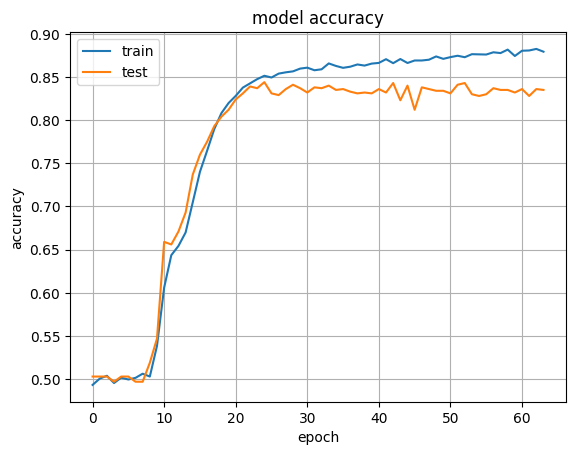

In [57]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

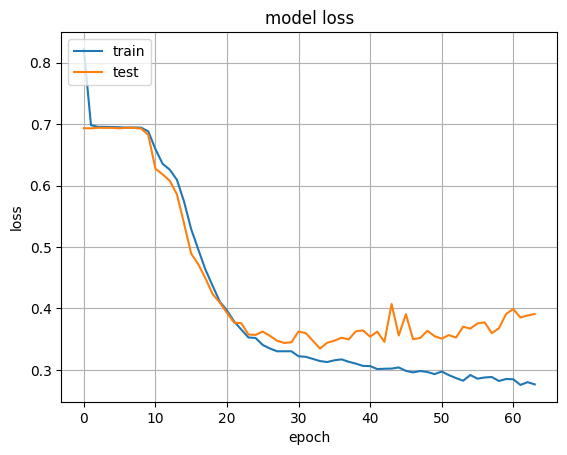

In [58]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 1s 4ms/step


In [60]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [61]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [62]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [63]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [64]:

val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.99999666


In [65]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [66]:

my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [73]:
my_question = "Is the football in the kitchen ?"

In [74]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
splitted_my_story=my_story.split()

In [75]:
mydata = [(splitted_my_story,my_question.split(),'yes')]

In [76]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [77]:
pred_results = model.predict(([ my_story, my_ques]))

1/1 [==============================] - 0s 30ms/step


In [78]:

val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.99971193
